1.Scikit learn comes with the pre-loaded dataset, load the digits dataset from that collection and 

write a helper function to plot the image using matplotlib.[Hint:Explore datasets module from scikit learn]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [1]:
from sklearn.datasets import load_digits
digit=load_digits()

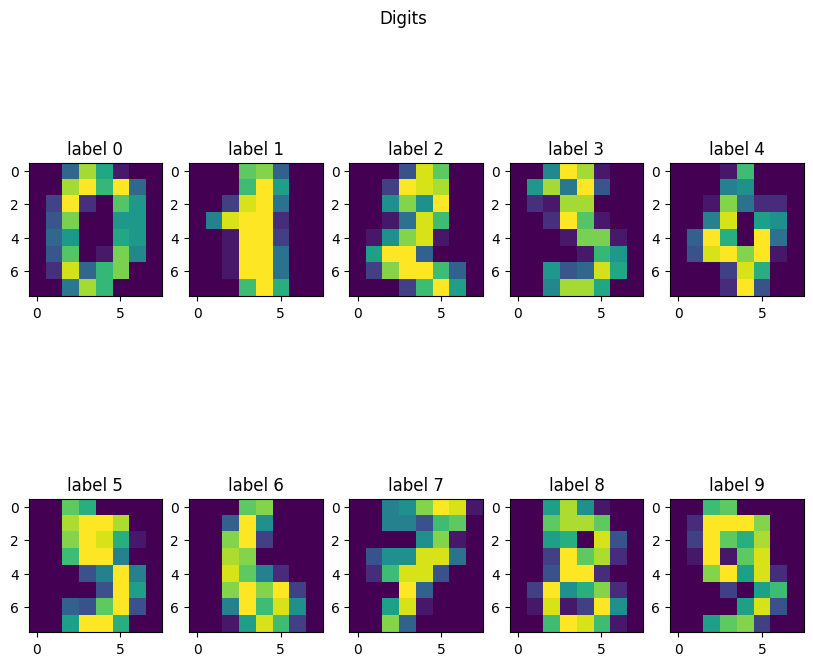

In [7]:
def plot_helper(x,y):
    plt.figure(figsize=(10,8))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(x[i])
        plt.title(f'label {y[i]}')
    plt.suptitle("Digits")
    plt.show()
        
        
plot_helper(digit.images,digit.target)
        
        

2.Make a train-testsplit with 20% of the data set aside for testing. Fit a logistic regression model and observe the accuracy.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [18]:
digit.data.shape

(1797, 64)

In [19]:
digit.target.shape

(1797,)

In [20]:
Lr=LogisticRegression(solver='lbfgs', max_iter=1000)
X_train,X_test,Y_train,Y_test=train_test_split(digit.data,digit.target,test_size=0.2,random_state=45)

In [21]:
Lr.fit(X_train,Y_train)

C:\Users\Komal\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [26]:
Y_pred=Lr.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(Y_test,Y_pred)

0.9555555555555556

Using scikit learn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in the original dataset. Find out the number of components in the projected subspace

.[Hint:Refer to decomposition module of scikit learn

In [34]:
from sklearn.decomposition import PCA
pca=PCA(0.95)

In [36]:
digit_pca=pca.fit_transform(digit.data)

In [37]:
digit_pca

array([[ -1.25946645,  21.27488348,  -9.46305462, ...,   3.67072108,
         -0.9436689 ,  -1.13250195],
       [  7.9576113 , -20.76869896,   4.43950604, ...,   2.18261819,
         -0.51022719,   2.31354911],
       [  6.99192297,  -9.95598641,   2.95855808, ...,   4.22882114,
          2.1576573 ,   0.8379578 ],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453, ...,  -3.56866194,
          1.82444444,   3.53885886],
       [ -4.87210009,  12.42395362, -10.17086635, ...,   3.25330054,
          0.95484174,  -0.93895602],
       [ -0.34438963,   6.36554919,  10.77370849, ...,  -3.01636722,
          1.29752723,   2.58810313]])

In [38]:
pca.n_components_

29

In [40]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [41]:
np.cumsum(explained_variance_ratio)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652])

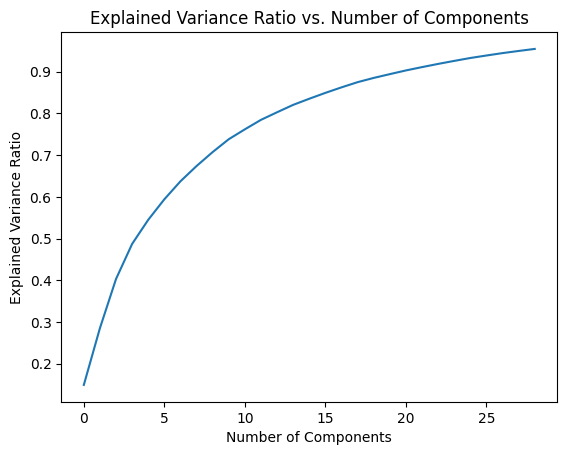

In [39]:
# Visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()

Transform the dataset and fit a logistic regression and observe the accuracy. 

Compare it with the previous model andcomment on the accuracy.[Hint: Project both the train and test samples to the new subspace

In [58]:
# we can see here the accuracy score increase as we reduct the dimention earlier there are 644 features but after using the PCS we are reducing the features into 29

Compute the confusion matrix and count the number of instances that havegone wrong. 

For each wrong sample,plot the digit along with the predicted and original label.

[[32  0  1  0  0  0  0  0  0  0]
 [ 0 27  1  0  0  0  0  0  0  0]
 [ 0  1 31  1  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  1  0  0  0  1  0  0 28  0]
 [ 0  1  0  1  0  0  0  0  1 37]]


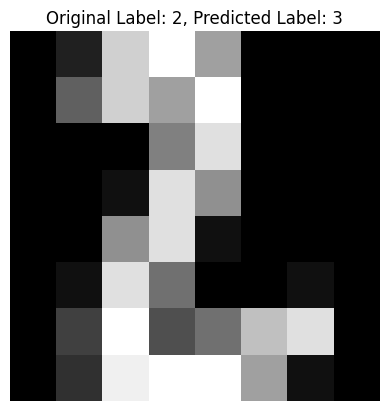

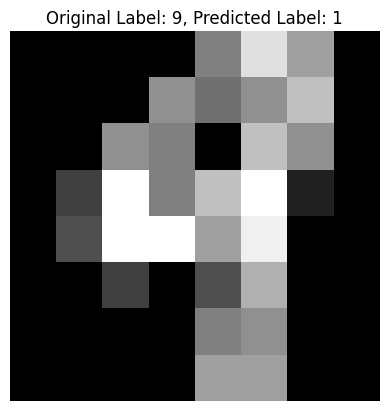

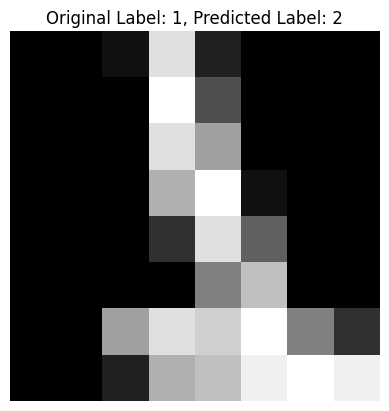

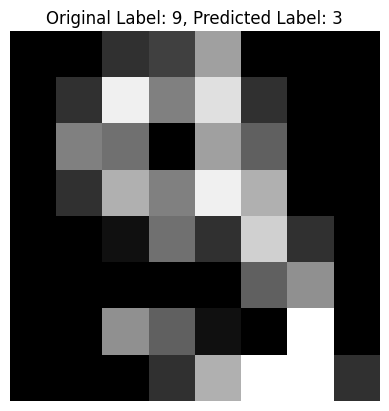

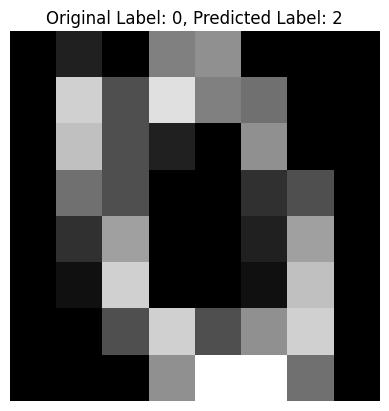

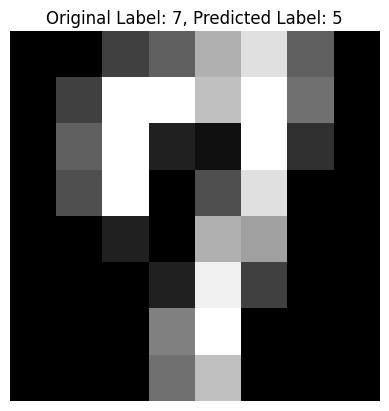

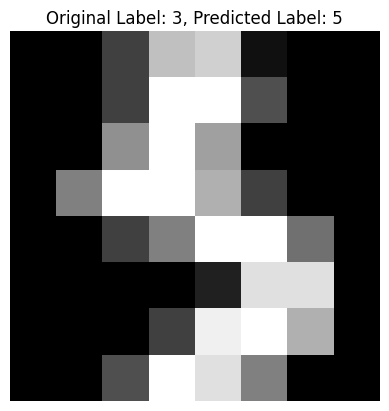

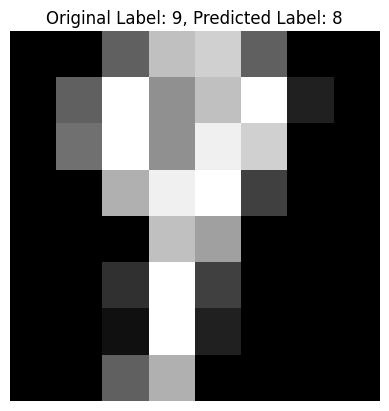

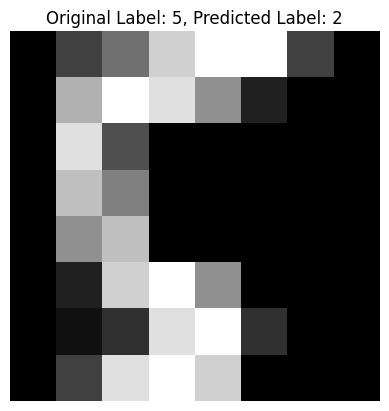

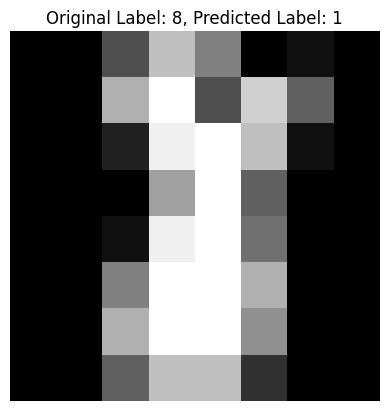

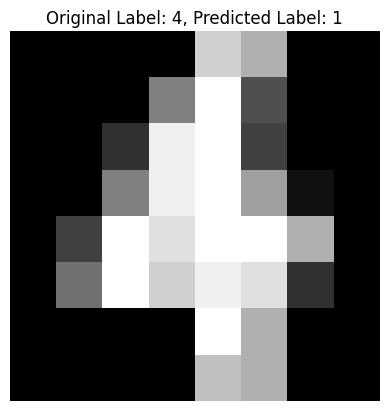

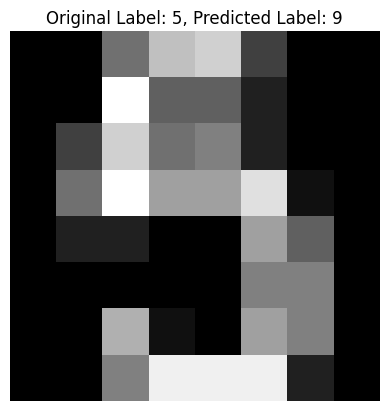

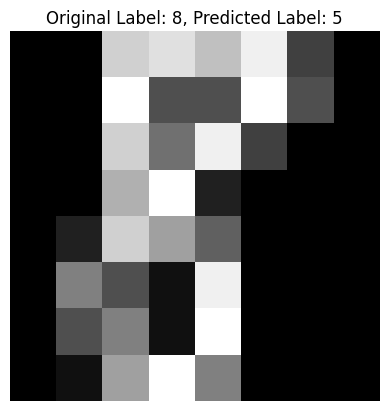

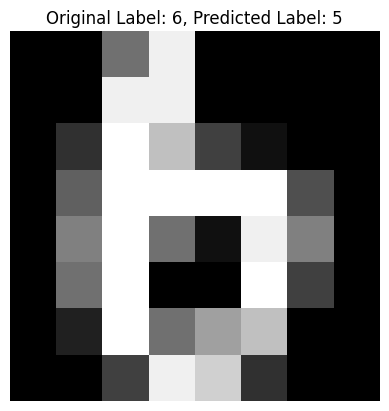

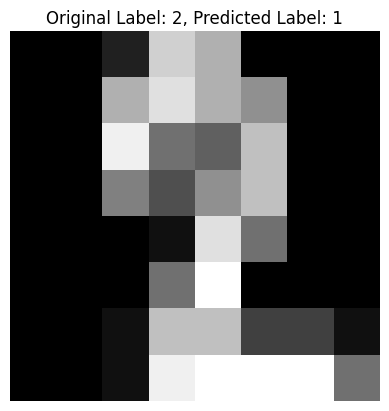

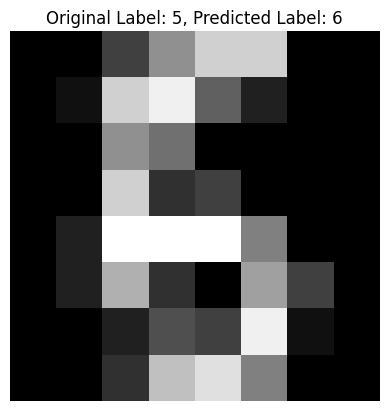

In [60]:
X_train, X_test, y_train, y_test = train_test_split(digit.data, digit.target, test_size=0.2, random_state=42)

# Perform PCA
pca = PCA(0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a logistic regression model on the PCA-transformed data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)

# Predict the labels on the test set
y_pred = model.predict(X_test_pca)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Plot instances with wrong predictions
wrong_indices = np.where(y_pred != y_test)[0]

for idx in wrong_indices:
    plt.figure()
    plt.imshow(X_test[idx].reshape(8, 8), cmap='gray')
    plt.title(f"Original Label: {y_test[idx]}, Predicted Label: {y_pred[idx]}")
    plt.axis('off')

plt.show()